In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
import numpy as np

In [30]:
train = pd.read_csv('train.csv')

In [5]:
train_2 = train.copy()

In [6]:
train.loc[(train['Age'] <= 5), 'age_type'] = 1
train.loc[(train['Age'] >= 6) & (train['Age'] <= 17), 'age_type'] = 2
train.loc[(train['Age'] >= 18) & (train['Age'] <= 29), 'age_type'] = 3
train.loc[(train['Age'] >= 30) & (train['Age'] <= 49), 'age_type'] = 4
train.loc[(train['Age'] >= 50) & (train['Age'] <= 64), 'age_type'] = 5
train.loc[(train['Age'] >= 65), 'age_type'] = 6
train.loc[(train['Age'].isnull()), 'age_type'] = 0

In [7]:
for i in train.index:
    if str(str.isdigit(train[train.index == i]['Ticket'].iloc[0])) == 'True':
        train.loc[train.index == i, 'employee_frag'] = 0
    else :
        train.loc[train.index == i, 'employee_frag'] = 1
train['employee_frag'] = train['employee_frag'].astype(int)

In [8]:
train.loc[(train['Sex'] == 'female'), 'sex'] = 0
train.loc[(train['Sex'] == 'male'), 'sex'] = 1

C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(array([ 54.,  54., 226., 229., 163.,  85.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

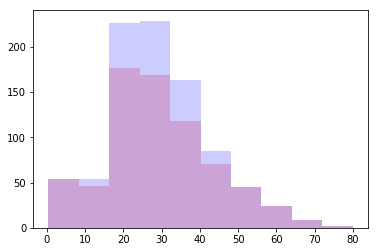

In [9]:
#平均・標準偏差・null数を取得する
Age_average = train["Age"].mean() #平均値
Age_std = train["Age"].std()  #標準偏差
Age_nullcount = train["Age"].isnull().sum() #null値の数＝補完する数

# 正規分布に従うとし、標準偏差の範囲内でランダムに数字を作る
rand = np.random.randint(Age_average - Age_std, Age_average + Age_std , size = Age_nullcount)

#Ageの欠損値
train_2["Age"][np.isnan(train["Age"])] = rand

#グラフ描画
plt.hist(train["Age"].dropna(), alpha=0.2,color="r")
plt.hist(train_2["Age"],alpha=0.2,color="b")

In [10]:
#相関係数を算出
corrmat = train.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,age_type,employee_frag,sex
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.039176,-0.072291,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.026634,-0.001492,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.311656,-0.079763,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.942872,0.029886,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.165278,0.080768,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.025523,0.035762,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.130698,0.173170,-0.182333
age_type,0.039176,0.026634,-0.311656,0.942872,-0.165278,-0.025523,0.130698,1.000000,0.073211,0.004028
employee_frag,-0.072291,-0.001492,-0.079763,0.029886,0.080768,0.035762,0.173170,0.073211,1.000000,0.032507
sex,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.004028,0.032507,1.000000


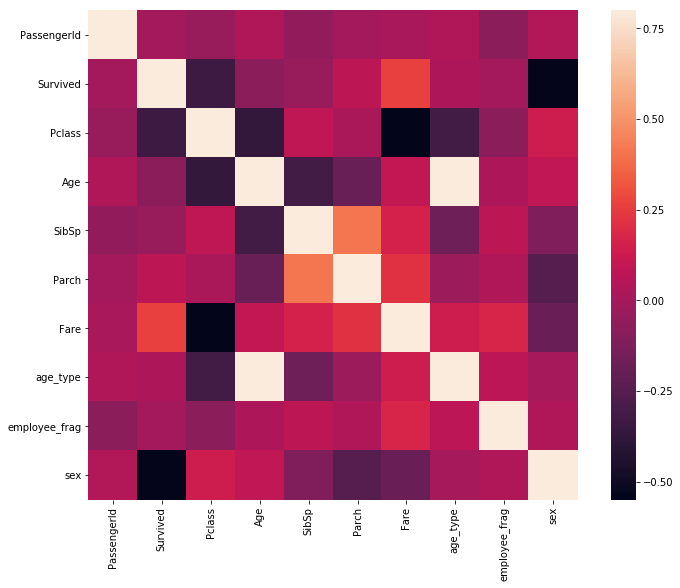

In [11]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

## ランダムフォレスト

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 訓練データと検証データに分ける関数
from sklearn.metrics import confusion_matrix, accuracy_score # 混同行列, 予測正解率を求める関数
import seaborn as sns

In [29]:
X_test_test = test.drop(labels = ["Age","Sex","Embarked","Ticket","Name","Cabin","Survived"], axis = 1)

NameError: name 'test' is not defined

In [27]:
# 特徴量と目的変数に分ける
X_train = train.drop(labels = ["Age","Sex","Embarked","Ticket","Name","Cabin","Survived"], axis = 1)
y_train = train["Survived"]

# 特徴量名を取り出しておく
feature_x_train = X_train.columns
feature_y_train = y_train.name

# 学習データと評価データに分ける
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 
print("shape of X and y for training: ", X_train_train.shape, y_train_train.shape)
print("shape of X and y for testing: ", X_train_test.shape, y_train_test.shape)

reg_rf_train = RandomForestRegressor(random_state=0, n_estimators=1000)
reg_rf_train.fit(X=X_train_train, y=y_train_train)

# 変数重要度
pd.Series(data = reg_rf_train.feature_importances_, 
          index = feature_x_train).sort_values(ascending = False)

shape of X and y for training:  (712, 8) (712,)
shape of X and y for testing:  (179, 8) (179,)


sex              0.295077
PassengerId      0.247768
Fare             0.213812
Pclass           0.085806
age_type         0.081253
SibSp            0.030655
Parch            0.027219
employee_frag    0.018410
dtype: float64

In [28]:
X_train_test

,PassengerId,Pclass,SibSp,Parch,Fare,age_type,employee_frag,sex
495,496,3,0,0,14.4583,0.0,0,1.0
648,649,3,0,0,7.5500,0.0,1,1.0
278,279,3,4,1,29.1250,2.0,0,1.0
31,32,1,1,0,146.5208,0.0,1,0.0
255,256,3,0,2,15.2458,3.0,0,0.0
298,299,1,0,0,30.5000,0.0,0,1.0
609,610,1,0,0,153.4625,4.0,1,0.0
318,319,1,0,2,164.8667,4.0,0,0.0
484,485,1,1,0,91.0792,3.0,0,1.0
367,368,3,0,0,7.2292,0.0,0,0.0


In [24]:
# 予測
y_rf_train_pred = reg_rf_train.predict(X_train_test)

In [ ]:
y_rf_train_pred_test = reg_rf_train.predict(X_train_test)

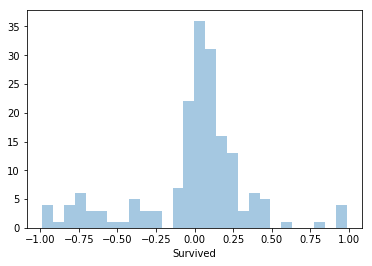

In [83]:
# 予測の誤差をプロット
sns.distplot(a=(y_rf_train_pred - y_train_test), kde=False)
plt.show()

In [97]:
X_train.loc[1:]

,PassengerId,Pclass,SibSp,Parch,Fare,age_type,employee_frag,sex,age
1,2,1,1,0,71.2833,4.0,1,0.0,38.0
2,3,3,0,0,7.9250,3.0,1,0.0,26.0
3,4,1,1,0,53.1000,4.0,0,0.0,35.0
4,5,3,0,0,8.0500,4.0,0,1.0,35.0
5,6,3,0,0,8.4583,0.0,0,1.0,17.0
6,7,1,0,0,51.8625,5.0,0,1.0,54.0
7,8,3,3,1,21.0750,1.0,0,1.0,2.0
8,9,3,0,2,11.1333,3.0,0,0.0,27.0
9,10,2,1,0,30.0708,2.0,0,0.0,14.0
10,11,3,1,1,16.7000,1.0,1,0.0,4.0


In [98]:
output = y_rf_train_pred.copy()

print(len(X_train['PassengerId']),len(output))

891 179


In [140]:
y_rf_train_D = pd.DataFrame(y_rf_train_pred)

In [154]:
y_rf_train_D[y_rf_train_S.index == i][0]

0    0.083
Name: 0, dtype: float64

In [195]:
y_rf_train_D.loc[y_rf_train_D[0]>=0.5,'Survived_t'] = 1
y_rf_train_D.loc[y_rf_train_D[0]<0.5,'Survived_t'] = 0

In [196]:
y_train_test.count()

179

In [197]:
y_train_test_D = pd.DataFrame(y_train_test).reset_index()

In [198]:
y_train_test_D

,index,Survived
0,495,0
1,648,0
2,278,0
3,31,1
4,255,1
5,298,1
6,609,1
7,318,1
8,484,1
9,367,1


In [199]:
y_rf_train_D[['Survived_t']].astype(int)

,Survived_t
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,1
9,1


In [202]:
pd.concat([y_train_test_D,y_rf_train_D[['Survived_t']].astype(int)], axis=1).set_index('index')

,Survived,Survived_t
index,,
495,0,0
648,0,0
278,0,0
31,1,1
255,1,0
298,1,0
609,1,1
318,1,1
484,1,1


# 予測結果をsubmissionの形に直す

In [129]:
len(y_rf_train_pred[y_rf_train_pred.astype(int) == 1])

4

In [128]:
len(y_rf_train_pred[y_rf_train_pred >= 0.5])

53

# 勾配ブースティング

In [16]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

C:\Users\ryota_hara\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ryota_hara\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## 特徴量推定

### RFEでの特徴量推定
-そんなに特徴量もないから必要…かな？

In [12]:
xgb.__version__

'0.72'

In [14]:
X='X_train_train'
y='y_train_train'

### GridSearchCVでのパラメーター推定

In [50]:
df_except_y = train.drop(["PassengerId","Age","Sex","Embarked","Ticket","Name","Cabin","Survived"], axis=1)
X = df_except_y.as_matrix()

# 目的変数に "y " を利用
y = train['Survived'].as_matrix()

params = {"learning_rate":[0.1,0.3,0.5],
        "max_depth": [2,3,5,10],
         "subsample":[0.5,0.8,0.9,1],
         "colsample_bytree": [0.5,1.0],
         }

# ハイパーパラメータ探索
mod = xgb.XGBRegressor()
cv = GridSearchCV(mod, params, cv = 10, scoring= 'roc_auc', n_jobs =-1)

#　trainデータとtestデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 予測モデルを作成
cv.fit(X_train, y_train)

#予測    
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)

C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
